# All oscillation analysis

Brief 1-2 sentence description of notebook.

In [1]:
# Imports of all used packages and libraries
import sys
import os
import git
import glob
from collections import defaultdict

In [2]:
git_repo = git.Repo(".", search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")

In [3]:
git_root

'/blue/npadillacoreano/ryoi360/projects/reward_comp/repos/reward_competition_extention'

In [4]:
sys.path.insert(0, os.path.join(git_root, 'src'))

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import os
import collections
import itertools
from collections import defaultdict
from itertools import combinations

In [7]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import mannwhitneyu
import scipy

In [8]:
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import colorsys

In [9]:
import utilities.helper
import trodes.read_exported

In [10]:
from pathlib import Path

In [11]:
import shutil

In [12]:
FONTSIZE = 20

In [13]:
font = {'weight' : 'medium',
        'size'   : 20}

matplotlib.rc('font', **font)

## Inputs & Data

Explanation of each input and where it comes from.

In [14]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [15]:
LFP_SPECTRAL_DF = pd.read_pickle("../proc/rce_pilot_2_10_per_trial_spectral_bans_sleap.pkl")

In [16]:
session_types = ["training", "omission", "both_rewarded", "novel"]

In [17]:
OUTCOME_TO_COLOR = {"both_rewarded": "green", 
"novel_lose": "#e67073",
"novel_win": "#93a5da",
"standard_lose": "#951a1d",
"standard_rewarded": "#0499af",
"standard_win": "#3853a3",
"omission_rewarded": "pink",
"omission": "orange"}

In [18]:
id_to_color = {'1.1': "red", '1.2': "blue", '1.4': "green"}

In [19]:
preprocessing_type = "raw"

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

In [20]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [21]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [22]:
LFP_SPECTRAL_DF.columns

Index(['tracked_subject', 'box_number', 'sleap_name', 'video_name',
       'current_subject', 'tone_start_frame', 'reward_start_frame',
       'tone_stop_frame', 'condition', 'competition_closeness',
       ...
       'baseline_subject_thorax_to_reward_port',
       'baseline_subject_thorax_velocity', 'baseline_video_timestamps',
       'trial_agent_locations', 'trial_agent_thorax_to_reward_port',
       'trial_agent_thorax_velocity', 'trial_subject_locations',
       'trial_subject_thorax_to_reward_port', 'trial_subject_thorax_velocity',
       'trial_video_timestamps'],
      dtype='object', length=275)

## Power plots

In [23]:
LFP_SPECTRAL_DF["trial_label"]

0        win
1       lose
2       lose
3       lose
4       lose
        ... 
1364    lose
1365    lose
1366    lose
1367    lose
1368    lose
Name: trial_label, Length: 1369, dtype: object

In [24]:
LFP_SPECTRAL_DF["experiment"]

0       standard
1       standard
2       standard
3       standard
4       standard
          ...   
1364       novel
1365       novel
1366       novel
1367       novel
1368       novel
Name: experiment, Length: 1369, dtype: object

In [25]:
LFP_SPECTRAL_DF["experiment_and_label"] = LFP_SPECTRAL_DF.apply(lambda x: "{}_{}".format(x["experiment"], x["trial_label"]) if x["experiment"] != x["trial_label"] else x["experiment"], axis=1)

In [26]:
LFP_SPECTRAL_DF["experiment_and_label"].unique()

array(['standard_win', 'standard_lose', 'standard_rewarded',
       'omission_rewarded', 'omission', 'both_rewarded', 'novel_lose',
       'novel_win'], dtype=object)

In [27]:
power_columns = set([col.replace("baseline_", "").replace("trial_", "") for col in LFP_SPECTRAL_DF.columns if "power" in col and "frequencies" not in col and "timestamps" not in col])

In [28]:
power_columns

{'BLA_power_gamma',
 'BLA_power_theta',
 'LH_power_gamma',
 'LH_power_theta',
 'MD_power_gamma',
 'MD_power_theta',
 'mPFC_power_gamma',
 'mPFC_power_theta',
 'vHPC_power_gamma',
 'vHPC_power_theta'}

In [29]:
LFP_SPECTRAL_DF[[col for col in LFP_SPECTRAL_DF.columns if "theta" in col and "power" in col]].head()

,baseline_mPFC_power_theta,baseline_MD_power_theta,baseline_LH_power_theta,baseline_BLA_power_theta,baseline_vHPC_power_theta,trial_mPFC_power_theta,trial_MD_power_theta,trial_LH_power_theta,trial_BLA_power_theta,trial_vHPC_power_theta
0,"[inf, inf, inf, inf, inf, 5290.0, 5490.0, inf,...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, 6384.0, inf, inf, inf, 6030.0, inf,...","[5110.0, 5996.0, 5456.0, inf, 6388.0, 5164.0, ...","[inf, inf, inf, 6696.0, inf, inf, inf, inf, in...","[6548.0, inf, 6096.0, 5170.0, 7228.0, inf, inf...","[inf, inf, inf, 7156.0, inf, inf, inf, inf, in...","[inf, inf, 6450.0, 7250.0, 6500.0, inf, inf, i..."
1,"[3384.0, inf, inf, 4468.0, 5230.0, 3500.0, 239...","[6764.0, inf, inf, 7132.0, inf, inf, inf, 6024...","[4864.0, 5424.0, 5640.0, 5130.0, inf, inf, 670...","[6716.0, inf, inf, 6744.0, inf, inf, inf, 5388...","[6830.0, 4230.0, 6280.0, 3922.0, inf, inf, 724...","[6276.0, 4984.0, 6390.0, inf, 6388.0, 5296.0, ...","[inf, inf, inf, inf, inf, inf, 7236.0, inf, in...","[inf, inf, inf, inf, inf, 6664.0, 6012.0, inf,...","[inf, inf, 5612.0, inf, inf, inf, inf, inf, in...","[inf, inf, inf, 5710.0, inf, inf, inf, inf, in..."
2,"[inf, 6868.0, 3804.0, inf, inf, inf, 6596.0, 7...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[7216.0, inf, inf, inf, inf, inf, inf, inf, in...","[inf, 6330.0, inf, inf, 5564.0, inf, inf, inf,...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ..."
3,"[2886.0, 6028.0, inf, inf, inf, inf, inf, 6780...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[6652.0, inf, inf, inf, inf, inf, inf, inf, in...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, 6332.0, inf, inf, inf, inf, inf, inf, in...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[inf, 4852.0, 7104.0, 7216.0, inf, inf, inf, i..."
4,"[4652.0, 6130.0, 4144.0, 3772.0, 3832.0, 5260....","[inf, inf, 6636.0, 6904.0, inf, inf, inf, inf,...","[inf, inf, 5170.0, 5052.0, 6470.0, inf, 5628.0...","[inf, inf, 5656.0, 5620.0, 6316.0, inf, 5450.0...","[inf, inf, 5412.0, 5100.0, inf, inf, inf, 7050...","[6344.0, inf, inf, inf, 5204.0, 5956.0, 6204.0...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[5724.0, inf, inf, 7130.0, 6696.0, 6130.0, inf...","[6516.0, inf, inf, inf, 5624.0, 4320.0, inf, i...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ..."


In [30]:
power_columns

{'BLA_power_gamma',
 'BLA_power_theta',
 'LH_power_gamma',
 'LH_power_theta',
 'MD_power_gamma',
 'MD_power_theta',
 'mPFC_power_gamma',
 'mPFC_power_theta',
 'vHPC_power_gamma',
 'vHPC_power_theta'}

In [31]:
if os.path.exists("./proc/plots/power_velocity_scatter"):
    shutil.rmtree("./proc/plots/power_velocity_scatter")

In [32]:
Path("./proc/plots/power_velocity_scatter/subj/png").mkdir(parents=True, exist_ok=True)
Path("./proc/plots/power_velocity_scatter/subj/svg").mkdir(parents=True, exist_ok=True)

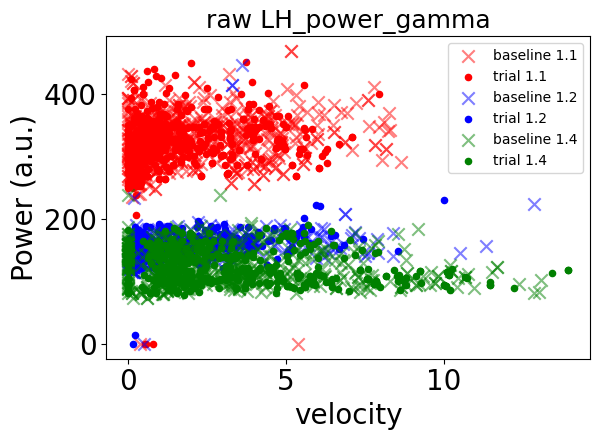

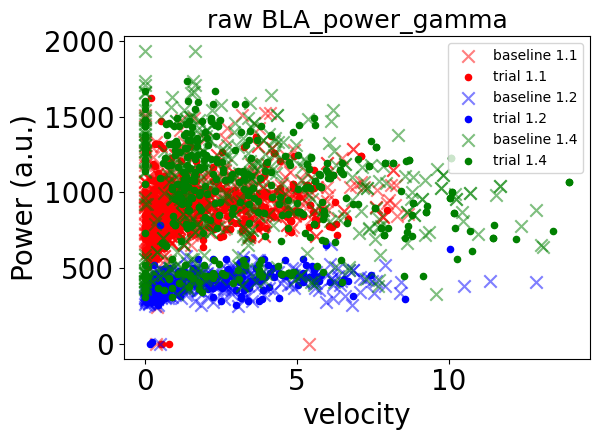

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


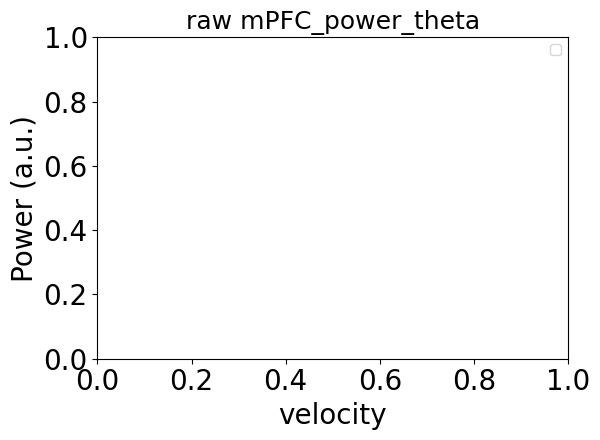

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


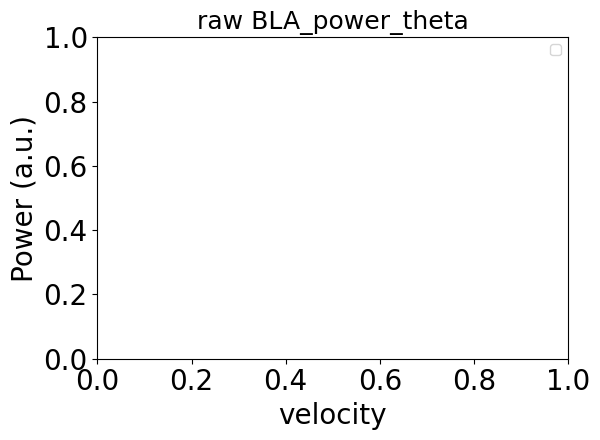

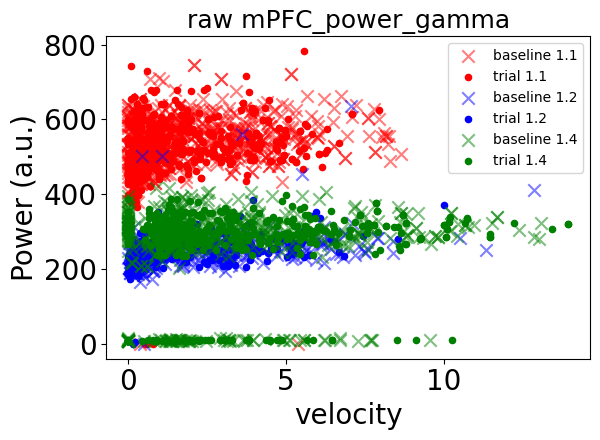

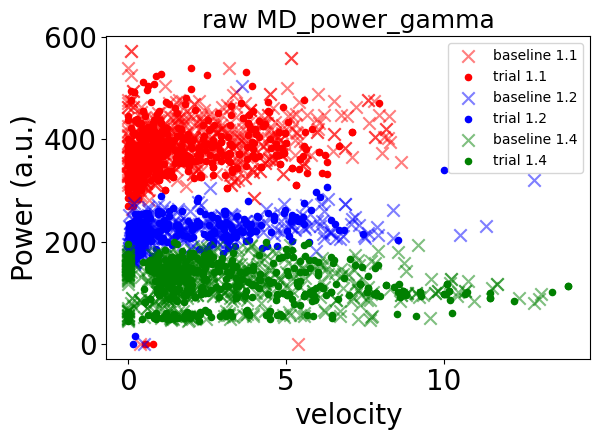

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


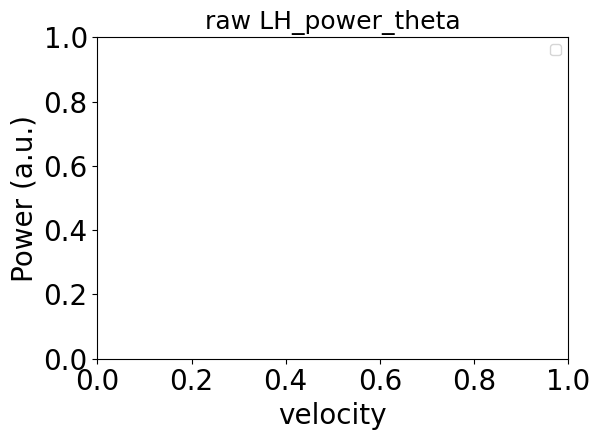

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


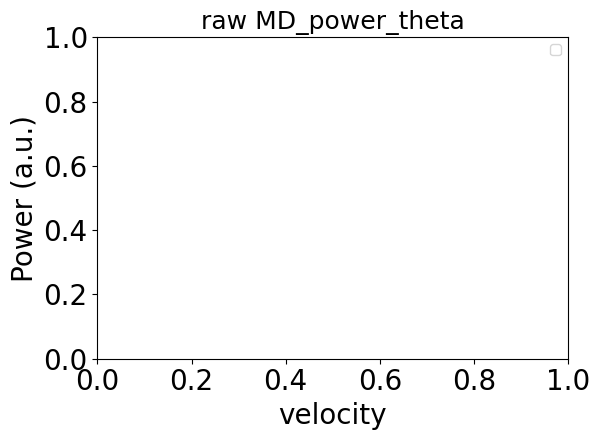

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


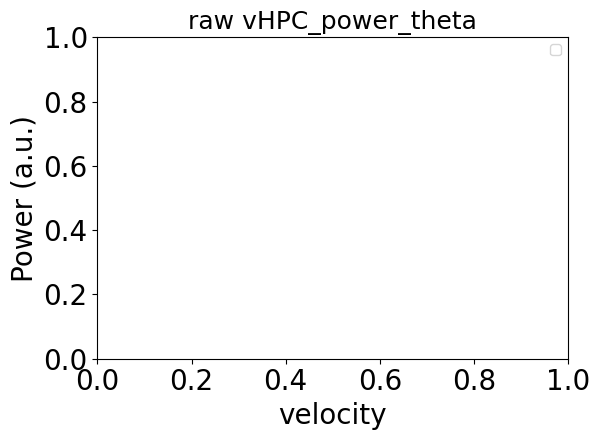

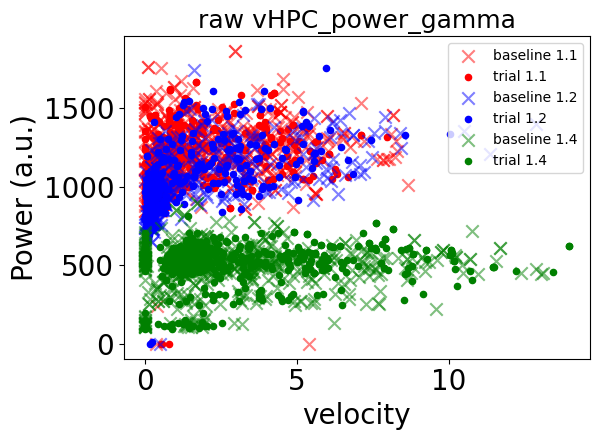

In [33]:
for power_col in power_columns:
    trial_rows = LFP_SPECTRAL_DF.copy()
    baseline_power_col = "baseline_{}".format(power_col)
    trial_power_col = "trial_{}".format(power_col)

    trial_rows[baseline_power_col] = trial_rows[baseline_power_col].apply(lambda x: np.nanmean(x))
    trial_rows[trial_power_col] = trial_rows[trial_power_col].apply(lambda x: np.nanmean(x))
    trial_rows["baseline_subject_thorax_velocity"] = trial_rows["baseline_subject_thorax_velocity"].apply(lambda x: np.nanmean(x))
    trial_rows["trial_subject_thorax_velocity"] = trial_rows["trial_subject_thorax_velocity"].apply(lambda x: np.nanmean(x))

    # Calculate Q1, Q3 and IQR
    Q1 = trial_rows[trial_power_col].quantile(0.25)
    Q3 = trial_rows[trial_power_col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    trial_lower_bound = Q1 - 1.5 * IQR
    trial_upper_bound = Q3 + 1.5 * IQR
    
    # Calculate Q1, Q3 and IQR
    Q1 = trial_rows[baseline_power_col].quantile(0.25)
    Q3 = trial_rows[baseline_power_col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    baseline_lower_bound = Q1 - 1.5 * IQR
    baseline_upper_bound = Q3 + 1.5 * IQR

    # Non-outlier values
    trial_rows = trial_rows[(trial_rows[trial_power_col] >= trial_lower_bound) & (trial_rows[trial_power_col] <= trial_upper_bound)]
    trial_rows = trial_rows[(trial_rows[baseline_power_col] >= baseline_lower_bound) & (trial_rows[baseline_power_col] <= baseline_upper_bound)]

    # trial_rows = trial_rows[(np.abs(stats.zscore(trial_rows[[power_col, "baseline_subject_thorax_velocity"]])) < 3).all(axis=1)]
    fig, ax = plt.subplots()
    plt.title("{} {}".format(preprocessing_type, power_col), fontsize=18)
    # print(trial_rows["baseline_subject_thorax_velocity"])
    # plt.scatter(trial_rows["baseline_subject_thorax_velocity"], trial_rows[baseline_power_col], label="baseline".format(), color="red", marker="x", alpha=0.5, s=80)
    # plt.scatter(trial_rows["trial_subject_thorax_velocity"], trial_rows[trial_power_col], label="trial".format(), color="blue", marker=".", s=80)
    
    for subj in trial_rows["current_subject"].unique():
        subj_rows = trial_rows[trial_rows["current_subject"] == subj]
        plt.scatter(subj_rows["baseline_subject_thorax_velocity"], subj_rows[baseline_power_col], label="baseline {}".format(subj), color=id_to_color[subj], marker="x", alpha=0.5, s=80)
        plt.scatter(subj_rows["trial_subject_thorax_velocity"], subj_rows[trial_power_col], label="trial {}".format(subj), color=id_to_color[subj], marker=".", s=80)
    
    
    plt.legend(fontsize=10)
    plt.xlabel("velocity")
    plt.ylabel("Power (a.u.)")
    plt.tight_layout()
    plt.savefig("./proc/plots/power_velocity_scatter/subj/png/{}_velocity_to_{}.png".format(preprocessing_type, power_col))
    plt.savefig("./proc/plots/power_velocity_scatter/subj/svg/{}_velocity_to_{}.svg".format(preprocessing_type, power_col))

    plt.show()
        
        
    



In [34]:
region_to_correlation = {}

for power_col in power_columns:
    trial_rows = LFP_SPECTRAL_DF.copy()
    baseline_power_col = "baseline_{}".format(power_col)
    trial_power_col = "trial_{}".format(power_col)

    trial_rows[baseline_power_col] = trial_rows[baseline_power_col].apply(lambda x: np.nanmean(x))
    trial_rows[trial_power_col] = trial_rows[trial_power_col].apply(lambda x: np.nanmean(x))
    trial_rows["baseline_subject_thorax_velocity"] = trial_rows["baseline_subject_thorax_velocity"].apply(lambda x: np.nanmean(x))
    trial_rows["trial_subject_thorax_velocity"] = trial_rows["trial_subject_thorax_velocity"].apply(lambda x: np.nanmean(x))

    # Calculate Q1, Q3 and IQR
    Q1 = trial_rows[trial_power_col].quantile(0.25)
    Q3 = trial_rows[trial_power_col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    trial_lower_bound = Q1 - 1.5 * IQR
    trial_upper_bound = Q3 + 1.5 * IQR
    
    # Calculate Q1, Q3 and IQR
    Q1 = trial_rows[baseline_power_col].quantile(0.25)
    Q3 = trial_rows[baseline_power_col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    baseline_lower_bound = Q1 - 1.5 * IQR
    baseline_upper_bound = Q3 + 1.5 * IQR

    # Non-outlier values
    trial_rows = trial_rows[(trial_rows[trial_power_col] >= trial_lower_bound) & (trial_rows[trial_power_col] <= trial_upper_bound)]
    trial_rows = trial_rows[(trial_rows[baseline_power_col] >= baseline_lower_bound) & (trial_rows[baseline_power_col] <= baseline_upper_bound)]
    
    region_to_correlation[power_col] = {"baseline": scipy.stats.pearsonr(trial_rows["baseline_subject_thorax_velocity"], trial_rows[baseline_power_col]), "trial": scipy.stats.pearsonr(trial_rows["trial_subject_thorax_velocity"], trial_rows[trial_power_col])}

        
        
    




ValueError: x and y must have length at least 2.

In [ ]:
correlation_df = pd.DataFrame.from_dict(region_to_correlation, orient="index")

In [ ]:
correlation_df["baseline_pearson"] = correlation_df["baseline"].apply(lambda x: x[0]).astype(np.float16)
correlation_df["baseline_pvalue"] = correlation_df["baseline"].apply(lambda x: x[1]).astype(np.float16)
correlation_df["trial_pearson"] = correlation_df["trial"].apply(lambda x: x[0]).astype(np.float16)
correlation_df["trial_pvalue"] = correlation_df["trial"].apply(lambda x: x[1]).astype(np.float16)

In [ ]:
correlation_df = correlation_df.drop(columns = ["baseline", "trial"], errors="ignore")

In [ ]:
correlation_df

In [ ]:
power_col

In [35]:
Path("./proc/plots/power_velocity_scatter/trial_type/png").mkdir(parents=True, exist_ok=True)
Path("./proc/plots/power_velocity_scatter/trial_type/svg").mkdir(parents=True, exist_ok=True)

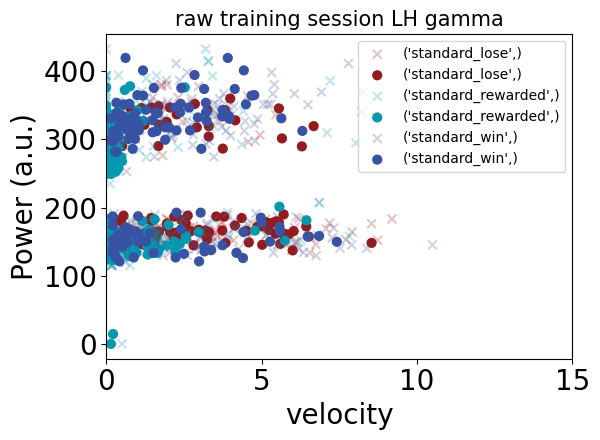

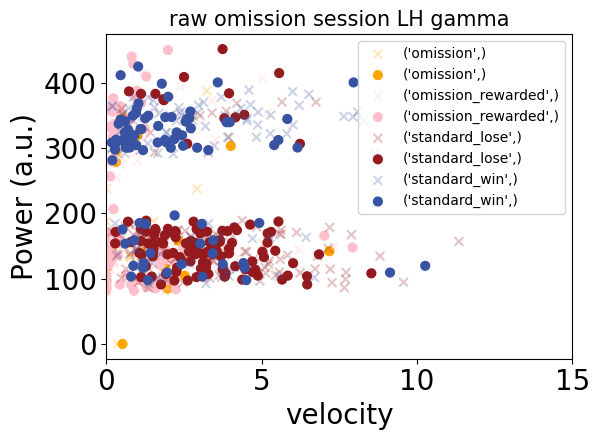

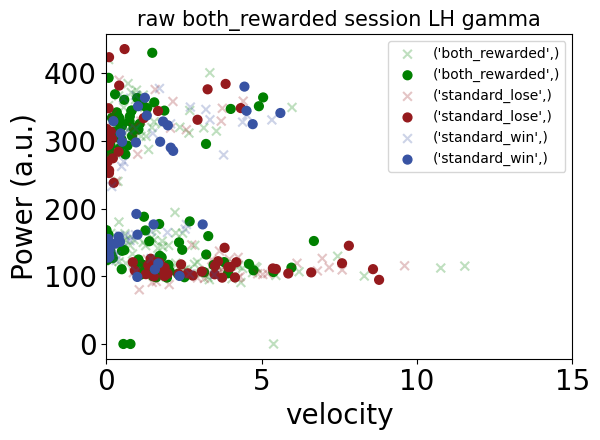

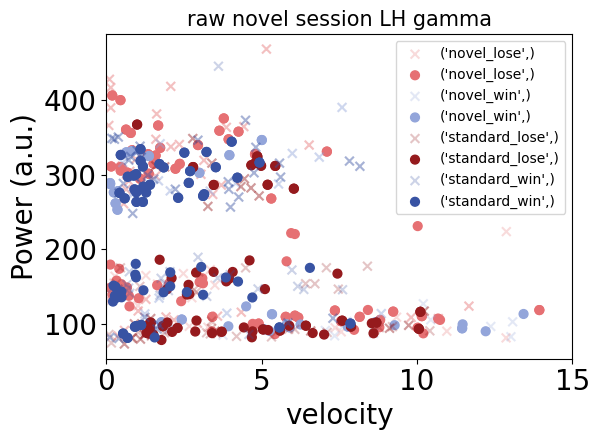

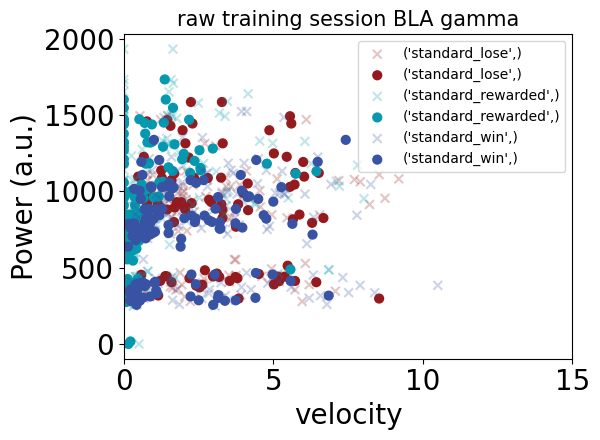

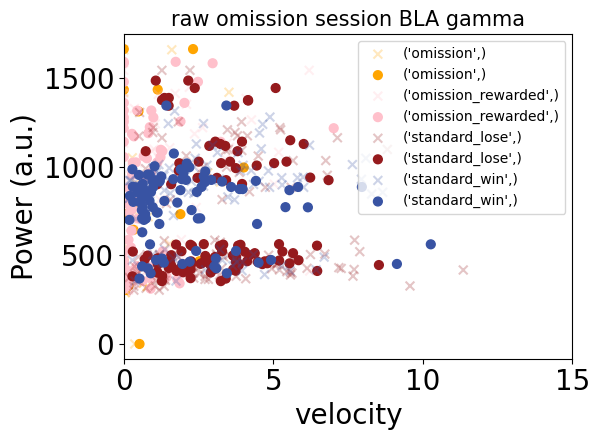

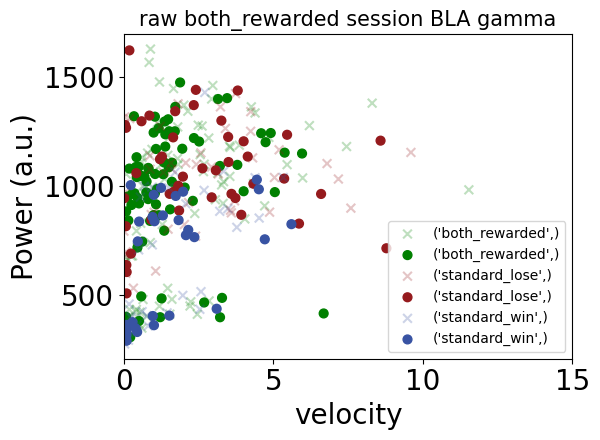

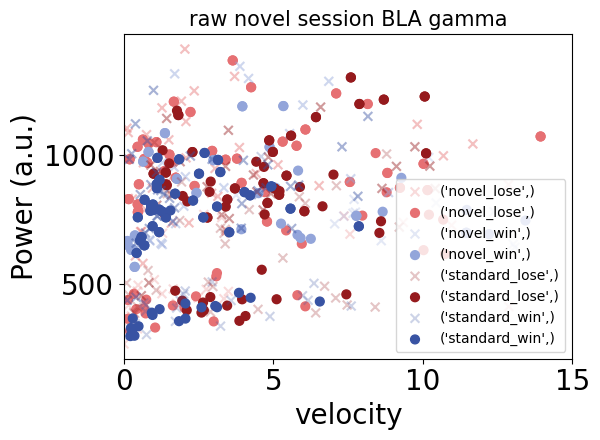

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


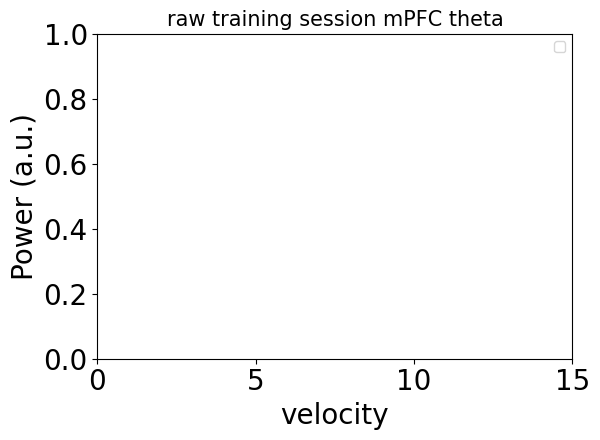

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


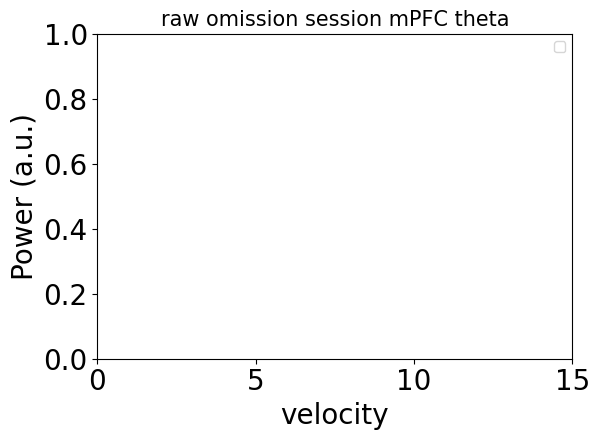

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


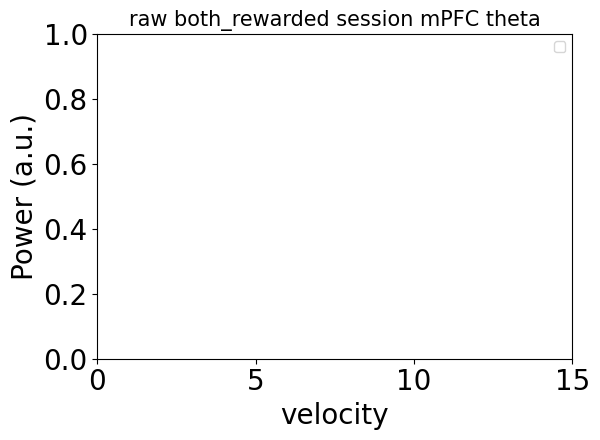

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


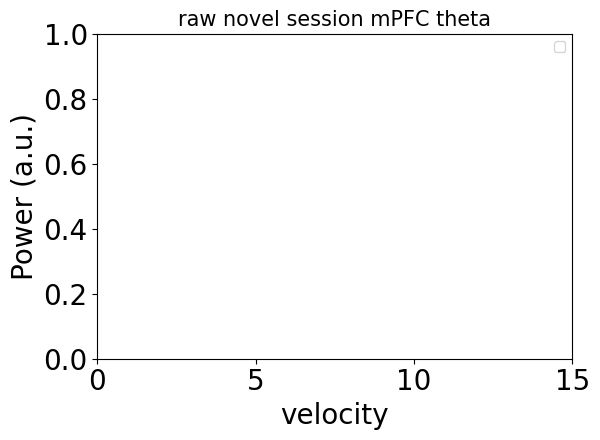

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


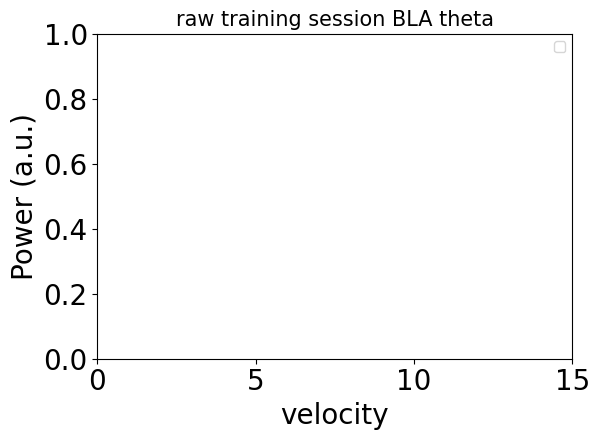

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


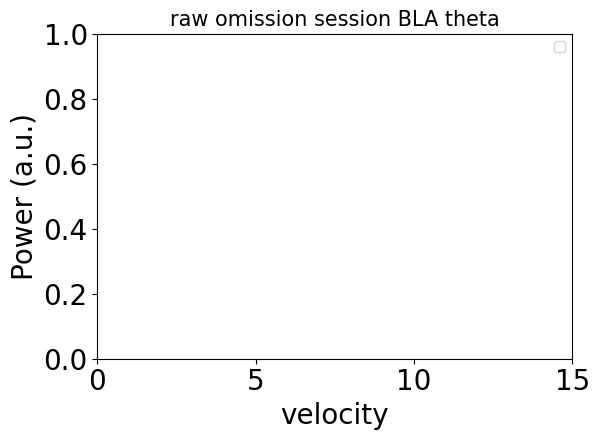

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


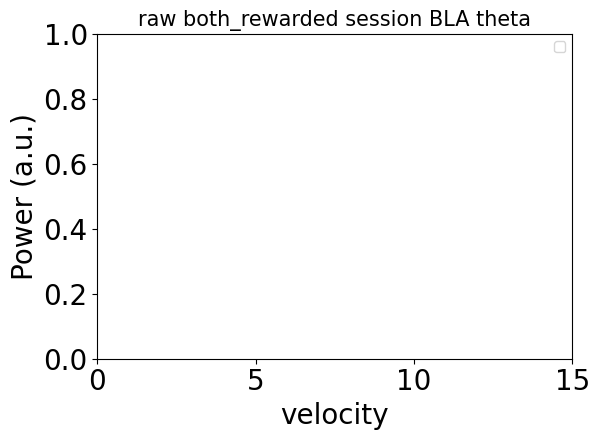

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


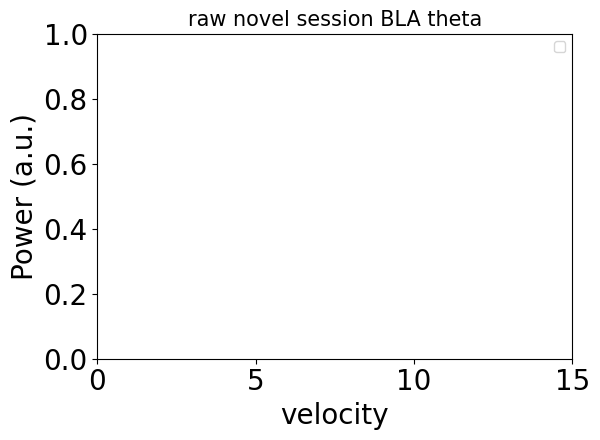

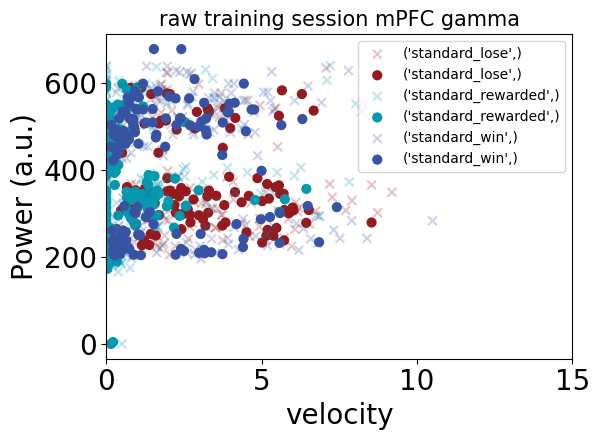

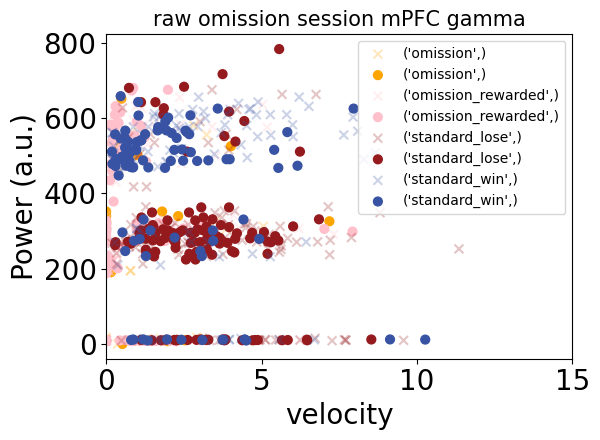

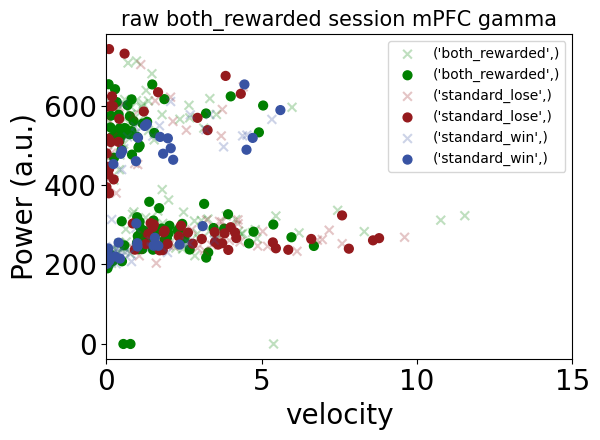

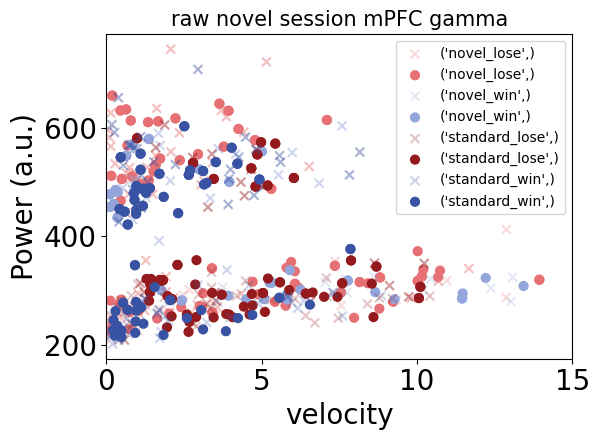

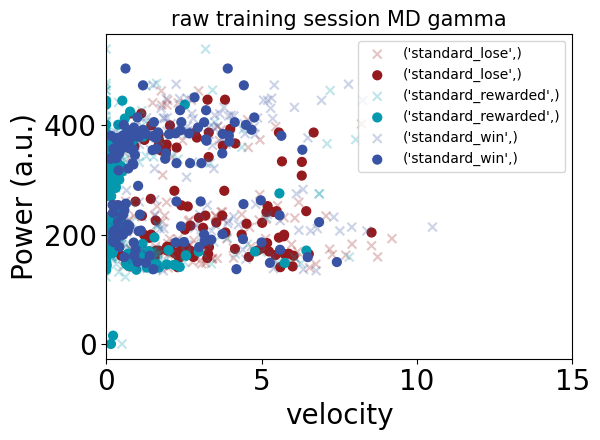

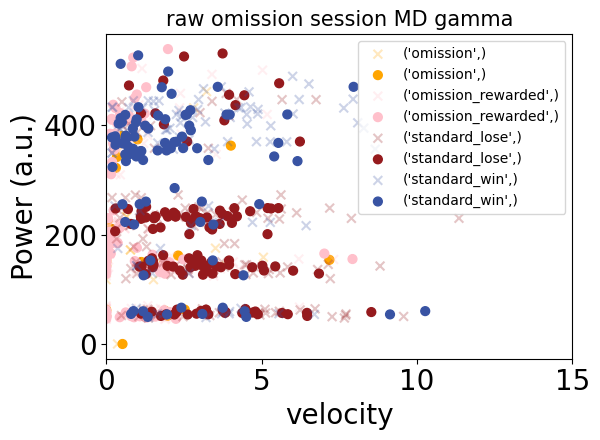

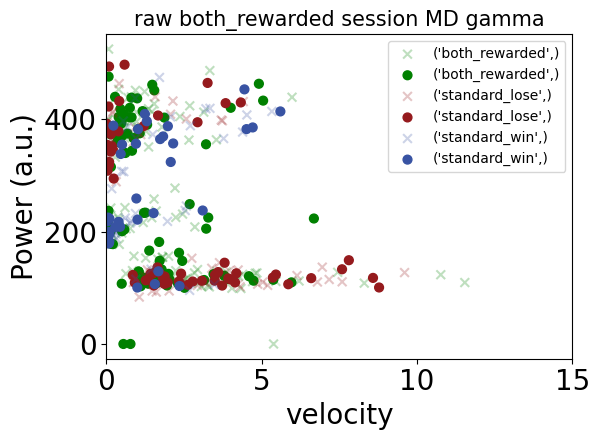

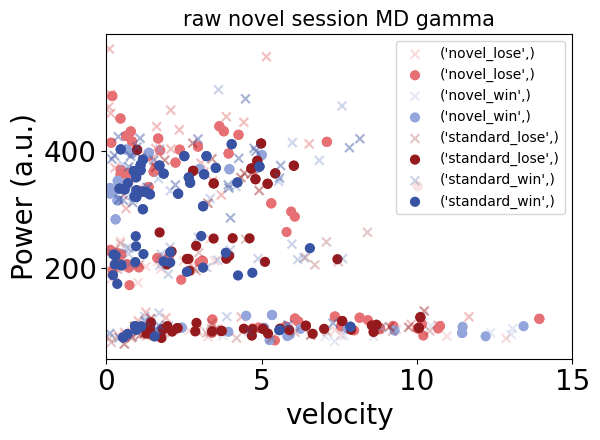

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


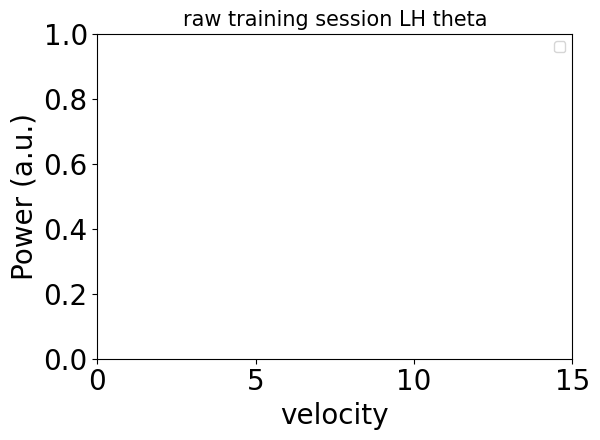

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


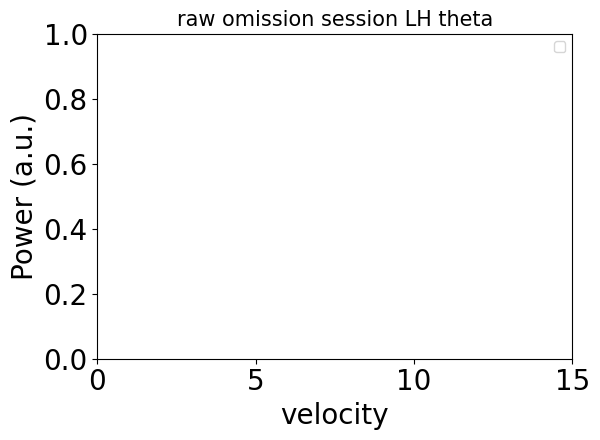

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


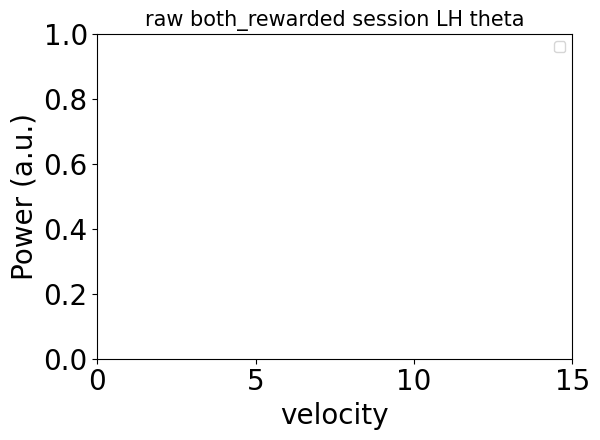

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


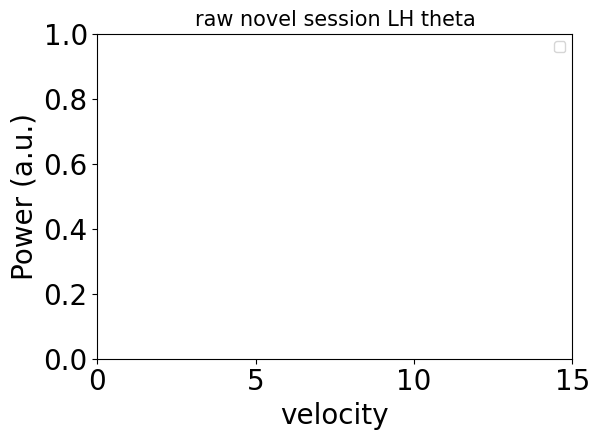

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


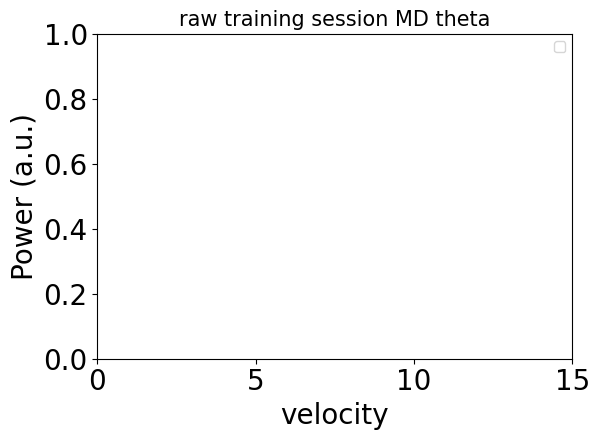

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


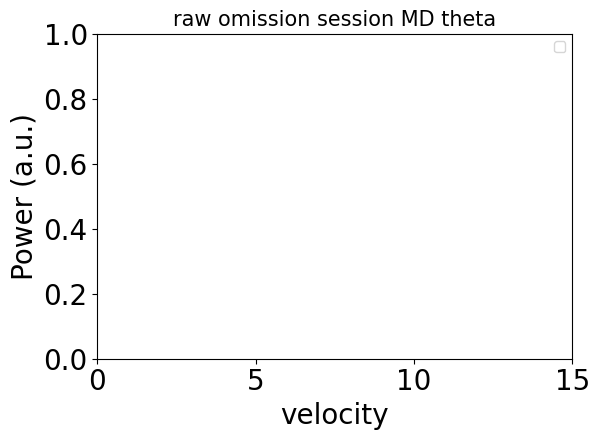

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


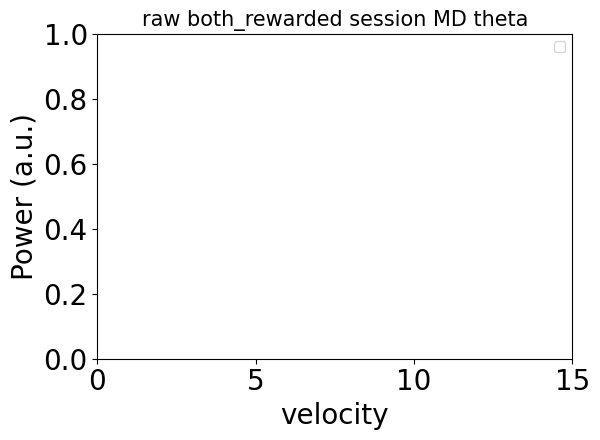

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


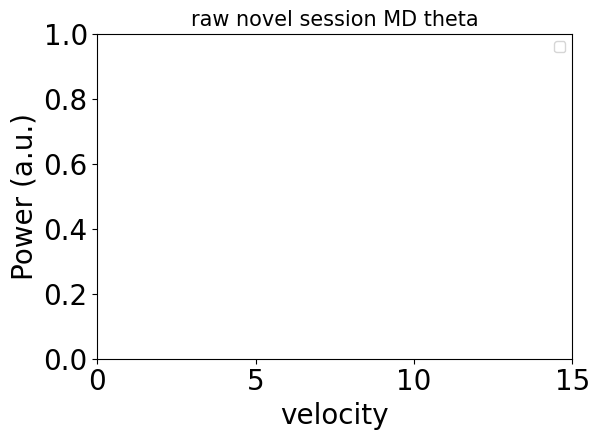

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


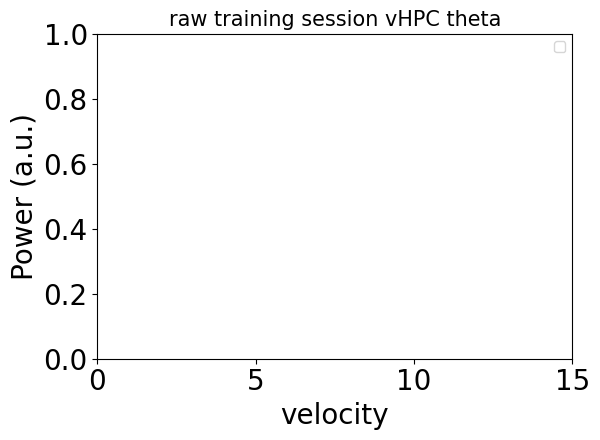

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


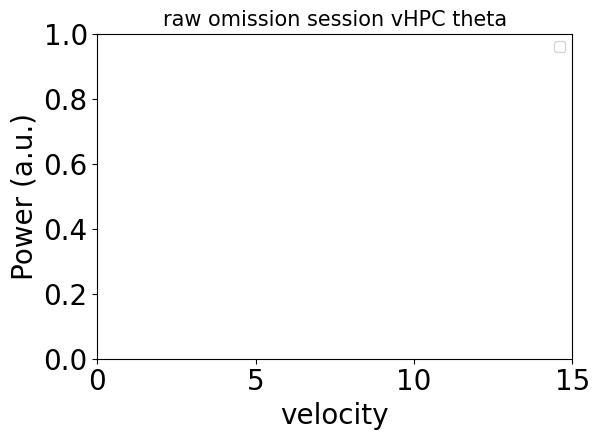

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


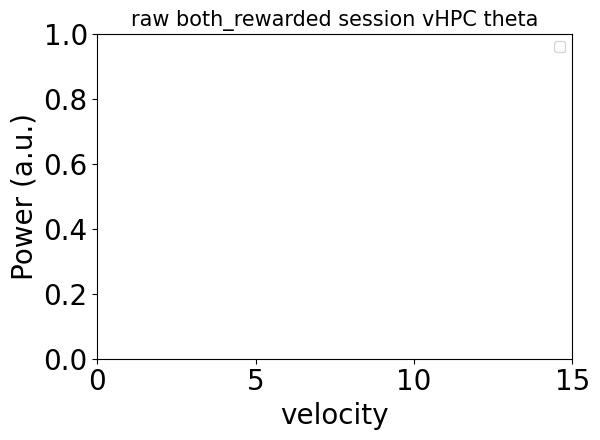

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


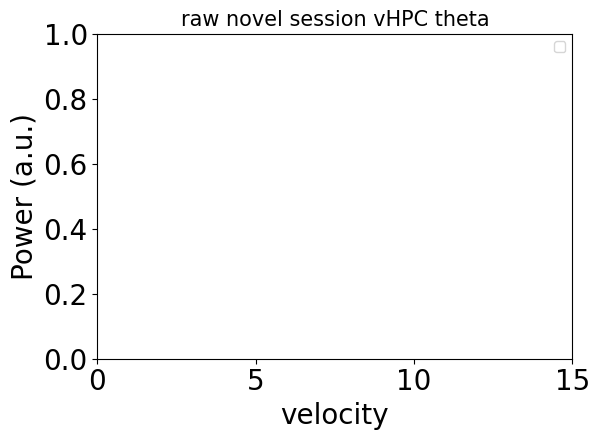

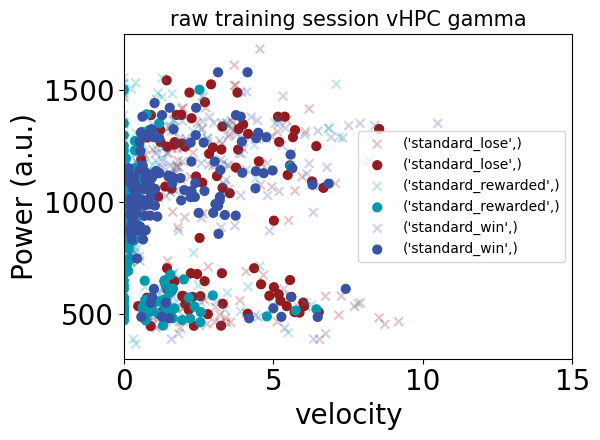

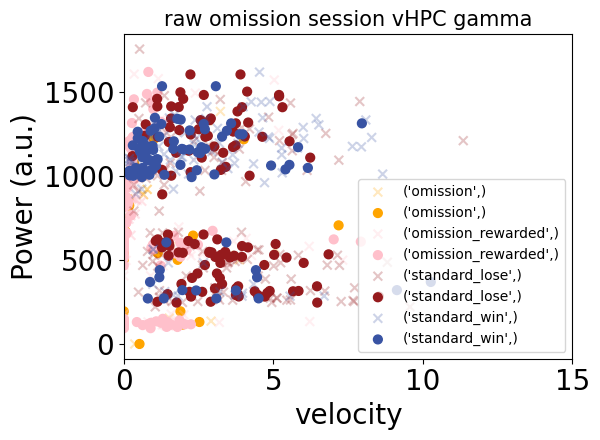

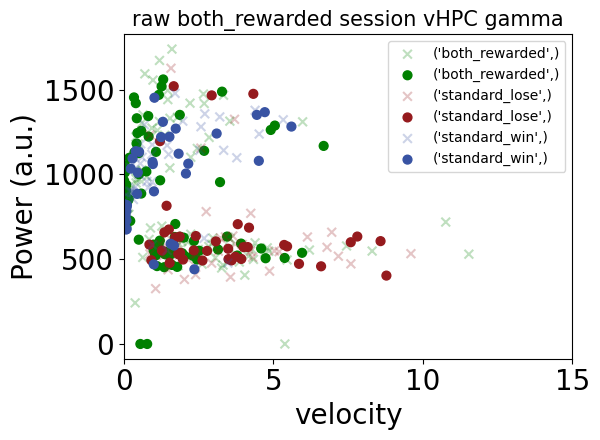

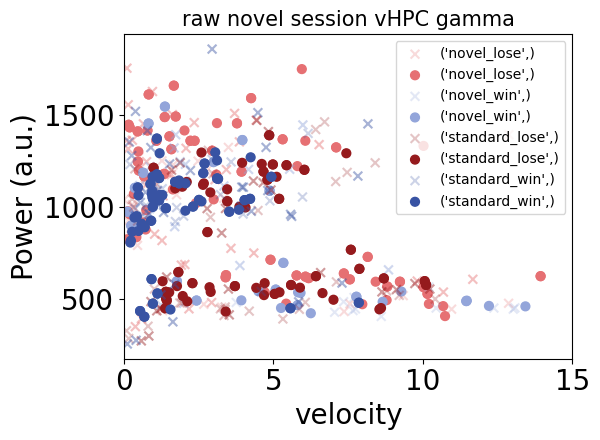

In [36]:
for power_col in power_columns:
    for trial_label in session_types:
        trial_rows = LFP_SPECTRAL_DF[LFP_SPECTRAL_DF["recording"].str.contains(trial_label)]
        baseline_power_col = "baseline_{}".format(power_col)
        trial_power_col = "trial_{}".format(power_col)
        
        trial_rows[baseline_power_col] = trial_rows[baseline_power_col].apply(lambda x: np.nanmean(x))
        trial_rows[trial_power_col] = trial_rows[trial_power_col].apply(lambda x: np.nanmean(x))
        trial_rows["baseline_subject_thorax_velocity"] = trial_rows["baseline_subject_thorax_velocity"].apply(lambda x: np.nanmean(x))
        trial_rows["trial_subject_thorax_velocity"] = trial_rows["trial_subject_thorax_velocity"].apply(lambda x: np.nanmean(x))
        
        trial_rows["color"] = trial_rows["experiment_and_label"].map(OUTCOME_TO_COLOR)
        
        # Calculate Q1, Q3 and IQR
        Q1 = trial_rows[trial_power_col].quantile(0.25)
        Q3 = trial_rows[trial_power_col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        trial_lower_bound = Q1 - 1.5 * IQR
        trial_upper_bound = Q3 + 1.5 * IQR

        # Calculate Q1, Q3 and IQR
        Q1 = trial_rows[baseline_power_col].quantile(0.25)
        Q3 = trial_rows[baseline_power_col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        baseline_lower_bound = Q1 - 1.5 * IQR
        baseline_upper_bound = Q3 + 1.5 * IQR

        # Non-outlier values
        trial_rows = trial_rows[(trial_rows[trial_power_col] >= trial_lower_bound) & (trial_rows[trial_power_col] <= trial_upper_bound)]
        trial_rows = trial_rows[(trial_rows[baseline_power_col] >= baseline_lower_bound) & (trial_rows[baseline_power_col] <= baseline_upper_bound)]

        # trial_rows = trial_rows[(np.abs(stats.zscore(trial_rows[[power_col, "baseline_subject_thorax_velocity"]])) < 3).all(axis=1)]
        fig, ax = plt.subplots()
        plt.title("{} {} session {}".format(preprocessing_type, trial_label, " ".join(power_col.split("_power_"))), fontsize=15)
        # print(trial_rows["baseline_subject_thorax_velocity"])
        
      
        # Iterate over the unique values in the 'label' column
        for label, group_df in trial_rows.groupby(["experiment_and_label"]):
            ax.scatter(group_df["baseline_subject_thorax_velocity"], group_df[baseline_power_col], label=label, color=group_df["color"], marker="x", alpha=0.25, s=40)
            ax.scatter(group_df["trial_subject_thorax_velocity"], group_df[trial_power_col], label=label, color=group_df["color"], marker=".", s=160)
        
        plt.legend(fontsize=10)
        plt.xlabel("velocity", fontsize=20)
        plt.ylabel("Power (a.u.)", fontsize=20)
        plt.xlim(0, 15)

        plt.tight_layout()
        plt.savefig("./proc/plots/power_velocity_scatter/trial_type/png/{}_{}_velocity_to_{}.png".format(preprocessing_type, trial_label, power_col))
        plt.savefig("./proc/plots/power_velocity_scatter/trial_type/svg/{}_{}_velocity_to_{}.svg".format(preprocessing_type, trial_label, power_col))

        plt.show()
        
        
    

